In [6]:
import sys
sys.path.append('..')
import numpy as np
from common.functions import softmax
from ch06.rnnlm import Rnnlm
from ch06.better_rnnlm import BetterRnnlm

class RnnlmGen(Rnnlm): # 상속 (base)
    def generate(self, start_id, skip_ids=None, sample_size=100):
        '''
        start_id : 최초로 주는 단어의 ID
        skip_ids : 단어id의 리스트, 해당 리스트에 속하는 단어id는 샘플링되지 않도록
                   (<unk>, N 등)
        sample_size : 샘플링하는 단어의 수 = 시퀀스 길이
        '''
        word_ids = [start_id]
        x = start_id

        while len(word_ids) < sample_size:
            x = np.array(x).reshape(1, 1) # 2차원으로 바꿔줌. 이유는
            score = self.predict(x) # 미니배치 처리, embedding layer -> (N, T)
            p = softmax(score.flatten())

            sampled = np.random.choice(len(p), size=1, p=p) 
            # p(확률분포)의 각 element = 자기 자신의 인덱스가 선택될 확률

            if (skip_ids is None) or (sampled not in skip_ids):
                x = sampled
                word_ids.append(int(x))
        return word_ids


In [12]:
import sys
sys.path.append('..')
from rnnlm_gen import RnnlmGen
from dataset import ptb

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
corpus_size = len(corpus)

model = RnnlmGen()
model.load_params('../ch06/Rnnlm.pkl')

# 시작 문자와 skip 문자 설정
start_word = 'you'
start_id = word_to_id[start_word]
skip_words = ['N', '<unk>', '$']
skip_ids = [word_to_id[w] for w in skip_words]

# 생성
word_ids = model.generate(start_id, skip_ids)
# [구분자].join(리스트) : 리스트의 요소들 사이에 구분자 삽입해서 연결
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')
print(txt)

you proceed but not formally to them.
 mr. roman 's style of industrial demand attorneys on diaper owned by the utilization genetic products balked at drexel burnham lambert men who have failed to test leather.
 as of some of his big board salespeople do n't yet lot of certain rhetoric republicans.
 the company is shares in grey acceptances from u.s. computer equipment stands to the organization of small social western proceeds all of overall interests.
 the carolinas closer to keep offsetting fabric from management will remove out the penalty.
 before by some ownership and true


In [9]:
# [구분자].join(리스트) : 리스트의 요솓들 사이에 구분자 삽입해서 연결
' '.join(['i', 'love', 'you'])

'i love you'

you 'll include one of them a good problems.
moreover so if not gene 's corr experience with the heat of bridges a new
deficits model is non-violent what it 's a rule must exploit it.
there 's no tires industry could occur.
beyond my hours where he is n't going home says and japanese letter.
knight transplants d.c. turmoil with one-third of voters.
the justice department is ...

you proceed but not formally to them.
mr. roman 's style of industrial demand attorneys on diaper owned by the utilization genetic products balked at drexel burnham lambert men who have failed to test leather.
as of some of his big board salespeople do n't yet lot of certain rhetoric republicans.
the company is shares in grey acceptances from u.s. computer equipment stands to the organization of small social western proceeds all of overall interests.
the carolinas closer to keep offsetting fabric from management will remove out the penalty.
before by some ownership and true

In [16]:
import sys
sys.path.append('..')
from common.np import *
from rnnlm_gen import BetterRnnlmGen
from dataset import ptb

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
corpus_size = len(corpus)

model = BetterRnnlmGen()
model.load_params('../ch06/BetterRnnlm.pkl')

# start 문자와 skip 문자 설정
start_word = 'you'
start_id = word_to_id[start_word]
skip_words = ['N', '<unk>', '$']
skip_ids = [word_to_id[w] for w in skip_words]
# 문장 생성
word_ids = model.generate(start_id, skip_ids)
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')

print(txt)

you have to accept the bank 's face value to the final time.
 is a change in most of the nation 's major segments of public trafficking and more costs their marketing rules in their facilities according to a source of research firm in the press.
 we are the highest taking time and say norwood instructed your intent to use the ira.
 i think this can persuade us to stop its quarterly dividend.
 the ability to voluntarily encourage the dollar made only good interest in debt when necessary for less or more evidence to do that


In [20]:
model.reset_state()

start_words = 'the meaning of life is'
start_ids = [word_to_id[w] for w in start_words.split(' ')] # ['the','meaning'...]

for x in start_ids[:-1]:
    x = np.array(x).reshape(1, 1)
    model.predict(x) # 하나씩 lstm predict (lstm에 단어열 정보 유지 - h, c)

word_ids = model.generate(start_ids[-1], skip_ids)
word_ids = start_ids[:-1] + word_ids
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')
print('-' * 50)
print(txt)

/tmp/ipykernel_281697/365653114.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  word_ids.append(int(x))


--------------------------------------------------
the meaning of life is a very odd.
 and would be roger observed what 's trying to crash review franco years after doing it that something 's less better.
 a charitable investigator has who pumped an fine at a hearing of it flies to from sam hearst and later.
 for the next they 're part of a business battle.
 mr. jackson is hardly the chicago problem which enabled it to adequately develop the paper.
 james p. beers adopted the internal defense operations council on the food and food administration.
 i left them to time for the phone.



you 've seen two families and the women and two other women of students
the principles of investors that prompted a bipartisan rule of which had a
withdrawn target of black men or legislators interfere with the number of plant
can do to carry it together
the appeal was to deny steady increases in the operation of dna and educationa:
damage in the 1950s.
...

In [8]:
import sys
sys.path.append('..')
from dataset import sequence

(x_train, t_train), (x_test, t_test) = \
    sequence.load_data('addition.txt', seed=1984)
char_to_id, id_to_char = sequence.get_vocab()

# 입력 : 0~999 사이 숫자 2개
# 출력 : 구분자포함(_) 5글자 고정 (최대 999+999=1998)
# 구분자는 Decoder에 문자열을 생성하라고 알리는 신호로 사용 & 출력 문자 수 고정
print(x_train.shape, t_train.shape) # 문자 ID 
print(x_test.shape, t_test.shape)  

print(x_train[0]) # 최대 문자 수 (7,)가 여러개
print(t_train[0]) # 출력 5글자 고정

(45000, 7) (45000, 5)
(5000, 7) (5000, 5)
[ 3  0  2  0  0 11  5]
[ 6  0 11  7  5]


In [9]:
print(''.join([id_to_char[c] for c in x_train[0]])) # 1번째 데이터 예시
print(''.join([id_to_char[c] for c in t_train[0]]))

71+118 
_189 


In [1]:
import sys
sys.path.append('..')
from common.time_layers import *

class Encoder:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        embed_W = (rn(V, D) / 100).astype('f') # xs:(N,T), 각 T엔 id
        lstm_Wx = (rn(D, 4 * H) / np.sqrt(D)).astype('f') # affine 한번에 처리하고 4등분 나눠서 결과
        lstm_Wh = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b = np.zeros(4 * H).astype('f') # 가중치 공유!

        self.embed = TimeEmbedding(embed_W) # 추출
        self.lstm = TimeLSTM(lstm_Wx,lstm_Wh, lstm_b, stateful=False) # 짧은 시계열 데이터 여러개 -> 은닉상태 초기화

        self.params = self.embed.params + self.lstm.params
        self.grads = self.embed.grads + self.lstm.grads
        self.hs = None # encoder 출력은 안쓴다. lstm 계층에서 더 깊이x

    def forward(self, xs):
        xs = self.embed.forward(xs)
        hs = self.lstm.forward(xs)
        self.hs = hs
        return hs[:, -1, :] # 마지막 은닉 상태!! (N,T,H)

    def backward(self, dh): # decoder가 전해줌
        dhs = np.zeros_like(self.hs)
        dhs[:-1,:] = dh # decoder 전해주는 기울기 -> 마지막 hidden state에 대한 기울기 할당!

        dout = self.lstm.backward(dhs)
        dout = self.embed.backward(dout)
        return dout

In [7]:
class Decoder:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H, = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx = (rn(D, 4 * H) / np.sqrt(D)).astype('f') # affine 한번에 처리하고 4등분 나눠서 결과
        lstm_Wh = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b = np.zeros(4 * H).astype('f') # 가중치 공유!
        # 출력 위해
        affine_W = (rn(H, V) / np.sqrt(H)).astype('f')         
        affine_b = np.zeros(V).astype('f')

        self.embed = TimeEmbedding(embed_W) # [_, 6, 2, ]  
        self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=True) # 은닉 상태 유지
        self.affine = TimeAffine(affine_W, affine_b)
        
        self.params, self.grads = [], []
        for layer in (self.embed, self.lstm, self.affine):
            self.params += layer.params
            self.grads += layer.grads

    def forward(self, xs, h): # encoder에서 받은 h
        self.lstm_set_state(h)

        out = self.embed.forward(xs)
        out = self.lstm.forward(xs)
        score = self.affine.forward(out)
        return out
    
    def backward(self, dscore):
        dout = self.affine.backward(dscore)
        dout = self.lstm.backward(dout)
        dout = self.embed.backward(dout)
        dh = self.lstm.dh
        return dh # 시간 방향 기울기 dh
    
    def generate(self, h, start_id, sample_size):
        sampled = []
        sample_id = start_id
        self.lstm.set_state(h)

        for _ in range(sample_size): # 문자를 한개씩 - 추론
            x = np.array(sample_id).reshape((1, 1)) # auto-regressive(score)
            out = self.embed.forward(x) # (N,T)(,v) T엔 각각 V만큼 element 갖는 벡터들 -> (N,T,D)
            out = self.lstm.forward(out) # (N,T,D) -> (h_next, c_next ->) hs(N,T,H)
            score = self.affine.forward(out) # (N,T,H)- > (N,T,-1)(v)

            sample_id = np.argmax(score.flatten()) # auto-regressive
            sampled.append(int(sample_id))
            return sampled

In [9]:
import sys
sys.path.append('..')
from common.base_model import BaseModel

class Seq2seq(BaseModel): # load_params, save_parmas
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        self.encoder = Encoder(V, D, H)
        self.decoder = Decoder(V, D, H)
        self.softmax = TimeSoftmaxWithLoss()
        # 인코더 디코더 파라미터 + 기울기 합!!
        self.params = self.encoder.params + self.decoder.params
        self.grads = self.encoder.grads + self.decoder.grads

    def forward(self, xs, ts):
        # 출력데이터 ts 나누기 (입력/출력)
        decoder_xs, decoder_ts = ts[:, :-1], ts[:, 1:]

        h = self.encoder.forward(xs)
        score = self.decoder.forward(decoder_xs, h)
        loss = self.softmax.forward(score, decoder_ts)
        return loss

    def backward(self, dout=1):
        dout = self.softmax.backward(dout)
        dh = self.decoder.backward(dout)
        dout = self.encoder.backward(dh)
        return dout

    def generate(self, xs, start_id, sample_size):
        h = self.encoder.forward(xs)
        sampled = self.decoder.generate(h, start_id, sample_size)
        return sampled

In [11]:
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from seq2seq import Seq2seq
from peeky_seq2seq import PeekySeq2seq

# 데이터셋 읽기
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
char_to_id, id_to_char = sequence.get_vocab()

# 하이퍼파라미터 설정
vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 128 # 고정벡터 h
batch_size = 128
max_epoch = 25
max_grad = 5.0

# 모델 / 옵티마이저 / 트레이너 생성
model = Seq2seq(vocab_size, wordvec_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]] # (10퍼, 7/5), 배치 한개마다
        verbose = i < 10 # 10번까지만 결과 출력
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose) # 1or0

    acc = float(correct_num) / len(x_test) # 배치
    acc_list.append(acc)
    print('검증 정확도 %.3f%%' % (acc * 100))

| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 2.56
| 에폭 1 |  반복 21 / 351 | 시간 10[s] | 손실 2.53
| 에폭 1 |  반복 41 / 351 | 시간 14[s] | 손실 2.17
| 에폭 1 |  반복 61 / 351 | 시간 18[s] | 손실 1.96
| 에폭 1 |  반복 81 / 351 | 시간 22[s] | 손실 1.92
| 에폭 1 |  반복 101 / 351 | 시간 25[s] | 손실 1.87
| 에폭 1 |  반복 121 / 351 | 시간 29[s] | 손실 1.85
| 에폭 1 |  반복 141 / 351 | 시간 33[s] | 손실 1.83
| 에폭 1 |  반복 161 / 351 | 시간 37[s] | 손실 1.79
| 에폭 1 |  반복 181 / 351 | 시간 41[s] | 손실 1.77
| 에폭 1 |  반복 201 / 351 | 시간 44[s] | 손실 1.77
| 에폭 1 |  반복 221 / 351 | 시간 48[s] | 손실 1.76
| 에폭 1 |  반복 241 / 351 | 시간 52[s] | 손실 1.76
| 에폭 1 |  반복 261 / 351 | 시간 62[s] | 손실 1.76
| 에폭 1 |  반복 281 / 351 | 시간 67[s] | 손실 1.75
| 에폭 1 |  반복 301 / 351 | 시간 71[s] | 손실 1.74
| 에폭 1 |  반복 321 / 351 | 시간 79[s] | 손실 1.75
| 에폭 1 |  반복 341 / 351 | 시간 83[s] | 손실 1.74
Q 77+85  
T 162 
☒ 100 
---
Q 975+164
T 1139
☒ 1000
---
Q 582+84 
T 666 
☒ 1000
---
Q 8+155  
T 163 
☒ 100 
---
Q 367+55 
T 422 
☒ 1000
---
Q 600+257
T 857 
☒ 1000
---
Q 761+292
T 1053
☒ 1000
---
Q 830+597
T 1427
☒ 

In [17]:
x_test = np.random.randn(5, 3)
print(x_test)
print('\n')
for i in range(5):
    print(x_test[[i]]) # 한줄->2차원으로 [] 한번 더 감싸기
len(x_test)

[[ 1.20693185  1.74316375  1.36382502]
 [-0.64611887 -1.11631045  0.23219955]
 [ 0.68964312 -0.85064591  0.37218627]
 [ 0.77891938  0.61686776  0.84403026]
 [ 0.55133918  1.64201023  0.75953395]]


[[1.20693185 1.74316375 1.36382502]]
[[-0.64611887 -1.11631045  0.23219955]]
[[ 0.68964312 -0.85064591  0.37218627]]
[[0.77891938 0.61686776 0.84403026]]
[[0.55133918 1.64201023 0.75953395]]


5

In [18]:
for c in x_test.flatten():
    print(c) # 값 반환

1.2069318511409015
1.743163753477678
1.3638250177562516
-0.6461188681785582
-1.116310448754928
0.2321995521108635
0.6896431187765601
-0.8506459089189553
0.37218627295854895
0.7789193788412017
0.6168677633963925
0.8440302643581385
0.5513391801508378
1.6420102297217136
0.759533953627701


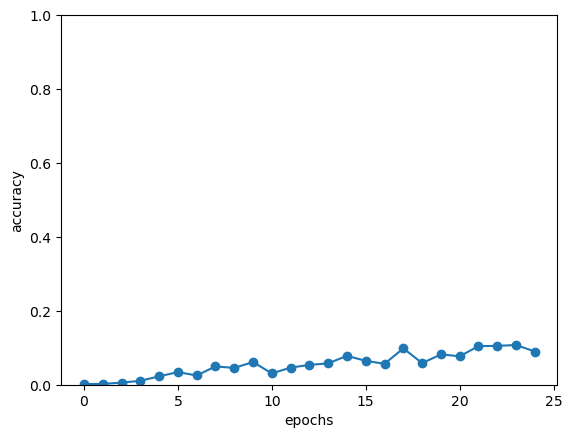

In [19]:
x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o')
plt.xlabel('epochs') # 25회
plt.ylabel('accuracy')
plt.ylim(0.0, 1.0)
plt.show()

In [28]:
# coding: utf-8
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from seq2seq import Seq2seq
from peeky_seq2seq import PeekySeq2seq


# 데이터셋 읽기
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
char_to_id, id_to_char = sequence.get_vocab()

# 입력 반전 여부 설정 =============================================
is_reverse = True  # True
if is_reverse:
    x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]
# ================================================================

# 하이퍼파라미터 설정
vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

# 일반 혹은 엿보기(Peeky) 설정 =====================================
model = Seq2seq(vocab_size, wordvec_size, hidden_size)
# model = PeekySeq2seq(vocab_size, wordvec_size, hidden_size)
# ================================================================
optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list_2 = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose, is_reverse)

    acc = float(correct_num) / len(x_test)
    acc_list_2.append(acc)
    print('검증 정확도 %.3f%%' % (acc * 100))

| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 2.56
| 에폭 1 |  반복 21 / 351 | 시간 3[s] | 손실 2.52
| 에폭 1 |  반복 41 / 351 | 시간 10[s] | 손실 2.17
| 에폭 1 |  반복 61 / 351 | 시간 12[s] | 손실 1.96
| 에폭 1 |  반복 81 / 351 | 시간 15[s] | 손실 1.91
| 에폭 1 |  반복 101 / 351 | 시간 18[s] | 손실 1.87
| 에폭 1 |  반복 121 / 351 | 시간 22[s] | 손실 1.86
| 에폭 1 |  반복 141 / 351 | 시간 33[s] | 손실 1.84
| 에폭 1 |  반복 161 / 351 | 시간 47[s] | 손실 1.80
| 에폭 1 |  반복 181 / 351 | 시간 55[s] | 손실 1.78
| 에폭 1 |  반복 201 / 351 | 시간 62[s] | 손실 1.77
| 에폭 1 |  반복 221 / 351 | 시간 73[s] | 손실 1.77
| 에폭 1 |  반복 241 / 351 | 시간 82[s] | 손실 1.76
| 에폭 1 |  반복 261 / 351 | 시간 89[s] | 손실 1.75
| 에폭 1 |  반복 281 / 351 | 시간 97[s] | 손실 1.74
| 에폭 1 |  반복 301 / 351 | 시간 104[s] | 손실 1.74
| 에폭 1 |  반복 321 / 351 | 시간 111[s] | 손실 1.74
| 에폭 1 |  반복 341 / 351 | 시간 119[s] | 손실 1.73
Q 77+85  
T 162 
☒ 100 
---
Q 975+164
T 1139
☒ 1000
---
Q 582+84 
T 666 
☒ 1001
---
Q 8+155  
T 163 
☒ 100 
---
Q 367+55 
T 422 
☒ 1001
---
Q 600+257
T 857 
☒ 1000
---
Q 761+292
T 1053
☒ 1000
---
Q 830+597
T 1427


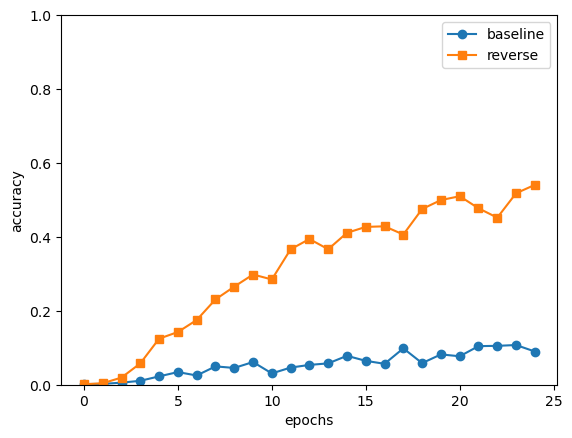

In [29]:
# 비교
x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o', label='baseline')
plt.plot(x, acc_list_2, marker='s', label='reverse')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.legend()
plt.show()

In [22]:
import sys
sys.path.append('..')
from common.time_layers import *
from seq2seq import Seq2seq, Encoder

class PeekyDecoder:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn
        # (N,T)(,v) -> (N,T,D)
        embed_W = (rn(V, D) / 100).astype('f') 
        # lstm, 입력에 H 더해지는만큼 가중치도
        # (N,T,H + D) -> (h_next, c_next ->) hs(N,T,H)
        lstm_Wx = (rn(H + D, 4 * H) / np.sqrt(H + D)).astype('f')
        lstm_Wh = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b = np.zeros(4 * H).astype('f')
        # affine, 입력에 H 더해지는만큼 가중치도
        # (N,T,H + H)- > (N,T,V)
        affine_W = (rn(H + H, V) / np.sqrt(H + H)).astype('f')
        affine_b = np.zeros(V).astype('f')

        self.embed = TimeEmbedding(embed_W)
        self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=True)
        self.affine = TimeAffine(affine_W, affine_b)

        self.params, self.grads = [], []
        for layer in (self.embed, self.lstm, self.affine):
            self.params += layer.params
            self.grads += layer.grads
        self.cache = None

    def forward(self, xs, h): # decoder!
        N, T = xs.shape
        N, H = h.shape

        self.lstm.set_state(h)
        #======================================= 1. 임베딩
        out = self.embed.forward(xs)
        # h(N,H)를 시계열 T만큼 복제해서 저장 -> (N*T, H)
        hs = np.repeat(h, T, axis=0).reshape(N, T, H)      
        # (N,T,D) + (N,T,H) = (N,T,D+H)
        out = np.concatenate((hs, out), axis=2)

        #======================================= 2. lstm
        out = self.lstm.forward(out)
        # (N,T,H) + (N,T,H) = (N,T,H+H)
        out = np.concatenate((hs, out), axis=2)

        #======================================= 3. afffne
        score = self.affine.forward(out) # (N,T,V)
        self.cache = H # back 때 사용.. h=(N,H)
        return score

    def backward(self, dscore):
        H = self.cache

        dout = self.affine.backward(dscore)
        # + H concat >> 쪼갬
        dout, dhs0 = dout[:, :, H:], dout[:, :, :H]
        dout = self.lstm.backward(dout)
        dembed, dhs1 = dout[:, :, H:], dout[:, :, :H]
        self.embed.backward(dembed)
        # repeat >> sum(T기준)
        dhs = dhs0 + dhs1
        dh = self.lstm.dh + np.sum(dhs, axis=1)
        return dh

    def generate(self, h, start_id, sample_size):
        sampled = []
        char_id = start_id
        self.lstm.set_state(h)

        H = h.shape[1] # h = (N,H)
        peeky_h = h.reshape(1, 1, H)
        for _ in range(sample_size):
            x = np.array([char_id]).reshape((1, 1))
            out = self.embed.forward(x) # (N,T)
            out = np.concatenate((peeky_h, out), axis=2)

            out = self.lstm.forward(out)
            out = np.concatenate((peeky_h, out), axis=2)

            score = self.affine.forward(out) # (N,T,V)

            char_id = np.argmax(score.flatten()) # auto-regressive(V)
            sampled.append(char_id)

        return sampled

class PeekySeq2seq(Seq2seq):
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        # 디코더만 변경
        self.encoder = Encoder(V, D, H)
        self.decoder = PeekyDecoder(V, D, H)
        self.softmax = TimeSoftmaxWithLoss()

        self.params = self.encoder.params + self.decoder.params
        self.grads = self.encoder.grads + self.decoder.grads

`np.repeat` 함수는 Numpy 배열의 요소를 반복하여 새 배열을 생성하는 데 사용됩니다. 이 경우 `h` 배열의 각 요소를 `T`번 반복하고, 결과를 `(N, T, H)` 형태로 재배열합니다. 이 과정을 통해, 각 시퀀스 스텝에 대해 동일한 초기 hidden state를 사용할 수 있습니다. 

예시를 통해 설명하겠습니다. 가정해봅시다:

- `h`는 `(N, H)` 차원을 가지는 배열이며, N=2, H=3이라고 합시다. 즉, 2개의 배치 사이즈와 각각 3개의 특성을 가진 배열입니다.
- `T`는 시퀀스 길이이며, 여기서는 T=4라고 가정합시다.

```python
import numpy as np

# 초기 hidden state h 정의
h = np.array([[1, 2, 3], [4, 5, 6]])
print("h:")
print(h)

# 시퀀스 길이 T
T = 4

# h를 T만큼 복제하고 (N, T, H)로 재배열
hs = np.repeat(h, T, axis=0).reshape(-1, T, h.shape[1])
print("hs:")
print(hs)
```

출력은 다음과 같이 될 것입니다:

```
h: # (2,3) T=4
[[1 2 3]
 [4 5 6]]
hs:
[[[1 2 3]
  [1 2 3]
  [1 2 3]
  [1 2 3]]

 [[4 5 6]
  [4 5 6]
  [4 5 6]
  [4 5 6]]]
```

- 여기서 `np.repeat(h, T, axis=0)`은 `h`의 각 행을 `T`만큼 반복합니다. 따라서 결과 배열의 크기는 `(N*T, H)`가 됩니다. 
- `reshape(-1, T, h.shape[1])`는 이 배열을 `(N, T, H)` 형태로 변형합니다. 여기서 `-1`은 Numpy가 자동으로 해당 차원의 크기를 계산하게 합니다. 결과적으로, 각 배치 항목에 대해 동일한 hidden state가 `T` 시간 스텝에 걸쳐 복제됩니다.

이러한 작업은 디코더에서 각 시간 스텝에 동일한 초기 상태를 제공하고자 할 때 유용합니다. 이는 모델이 시간에 따라 정보를 전달하는 방식에 따라 다를 수 있으며, 특정 구현이나 모델 아키텍처에서 필요한 방식으로 사용됩니다.

In [30]:
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from seq2seq import Seq2seq
from peeky_seq2seq import PeekySeq2seq


# 데이터셋 읽기
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
char_to_id, id_to_char = sequence.get_vocab()

# 입력 반전 여부 설정 =============================================
is_reverse = True  # True
if is_reverse:
    x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]
# ================================================================

# 하이퍼파라미터 설정
vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

# 일반 혹은 엿보기(Peeky) 설정 =====================================
#model = Seq2seq(vocab_size, wordvec_size, hidden_size)
model = PeekySeq2seq(vocab_size, wordvec_size, hidden_size)
# ================================================================
optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list_3 = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose, is_reverse)

    acc = float(correct_num) / len(x_test)
    acc_list_3.append(acc)
    print('검증 정확도 %.3f%%' % (acc * 100))

| 에폭 1 |  반복 1 / 351 | 시간 1[s] | 손실 2.57
| 에폭 1 |  반복 21 / 351 | 시간 7[s] | 손실 2.48
| 에폭 1 |  반복 41 / 351 | 시간 16[s] | 손실 2.20
| 에폭 1 |  반복 61 / 351 | 시간 27[s] | 손실 1.99
| 에폭 1 |  반복 81 / 351 | 시간 35[s] | 손실 1.89
| 에폭 1 |  반복 101 / 351 | 시간 41[s] | 손실 1.82
| 에폭 1 |  반복 121 / 351 | 시간 47[s] | 손실 1.82
| 에폭 1 |  반복 141 / 351 | 시간 54[s] | 손실 1.80
| 에폭 1 |  반복 161 / 351 | 시간 59[s] | 손실 1.79
| 에폭 1 |  반복 181 / 351 | 시간 68[s] | 손실 1.78
| 에폭 1 |  반복 201 / 351 | 시간 75[s] | 손실 1.77
| 에폭 1 |  반복 221 / 351 | 시간 82[s] | 손실 1.76
| 에폭 1 |  반복 241 / 351 | 시간 95[s] | 손실 1.76
| 에폭 1 |  반복 261 / 351 | 시간 103[s] | 손실 1.75
| 에폭 1 |  반복 281 / 351 | 시간 112[s] | 손실 1.74
| 에폭 1 |  반복 301 / 351 | 시간 122[s] | 손실 1.74
| 에폭 1 |  반복 321 / 351 | 시간 127[s] | 손실 1.73
| 에폭 1 |  반복 341 / 351 | 시간 132[s] | 손실 1.73
Q 77+85  
T 162 
☒ 100 
---
Q 975+164
T 1139
☒ 1013
---
Q 582+84 
T 666 
☒ 102 
---
Q 8+155  
T 163 
☒ 100 
---
Q 367+55 
T 422 
☒ 1023
---
Q 600+257
T 857 
☒ 1023
---
Q 761+292
T 1053
☒ 1023
---
Q 830+597
T 142

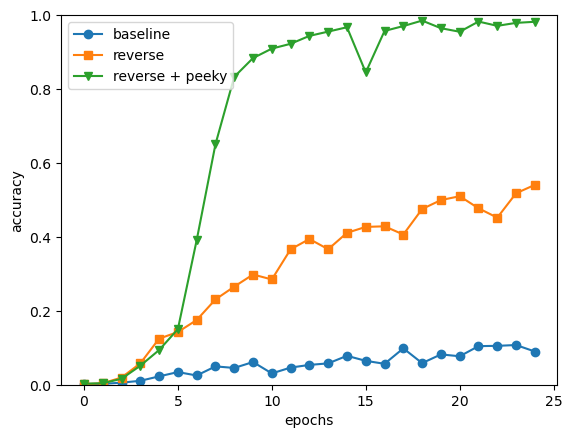

In [33]:
# 비교
x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o', label='baseline')
plt.plot(x, acc_list_2, marker='s', label='reverse')
plt.plot(x, acc_list_3, marker='v', label='reverse + peeky')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.legend()
plt.show()

In [37]:
acc_list_3[15:]

[0.845, 0.9572, 0.9704, 0.9852, 0.9646, 0.955, 0.9826, 0.971, 0.979, 0.982]

In [ ]:
import sys
sys.path.append('..')
import os
import numpy

id_to_char = {} # dict
char_to_id = {}

def _update_vocab(txt):
    chars = list(txt)

    for i, char in enumerate(chars):
        if char not in char_to_id:
            tmp_id = len(char_to_id)
            char_to_id[char] = tmp_id
            id_to_char[tmp_id] = char

def load_data(file_name='addition.txt', seed=1984):
    file_path = os.path.dirname(os.path.abspath(__file__)) + '/' + file_name

    if not os.path.exists(file_path):
        print('No file: %s' % file_name)
        return None

    questions, answers = [], []

    for line in open(file_path, 'r'):
        idx = line.find('_')
        questions.append(line[:idx])
        answers.append(line[idx:-1])

    # 어휘 사전 생성
    for i in range(len(questions)):
        q, a = questions[i], answers[i]
        _update_vocab(q)
        _update_vocab(a)

    # 넘파이 배열 생성 
    x = numpy.zeros((len(questions), len(questions[0])), dtype=int)
    t = numpy.zeros((len(questions), len(answers[0])), dtype=int)

    for i, sentence in enumerate(questions):
        x[i] = [char_to_id[c] for c in list(sentence)]
    for i, sentence in enumerate(answers):
        t[i] = [char_to_id[c] for c in list(sentence)]

    # 뒤섞기
    indices = numpy.arange(len(x))
    if seed is not None:
        numpy.random.seed(seed)
    numpy.random.shuffle(indices)
    x = x[indices]
    t = t[indices]

    # 검증 데이터셋으로 10% 할당
    split_at = len(x) - len(x) // 10
    (x_train, x_test) = x[:split_at], x[split_at:]
    (t_train, t_test) = t[:split_at], t[split_at:]

    return (x_train, t_train), (x_test, t_test)

def get_vocab():
    return char_to_id, id_to_char